# <u>**The Future Fate of the Milky Way and Andromeda**</u>
#### Written by Ekta Patel, U. Arizona (ektapatel@email.arizona.edu)
#### Simulation by Gurtina Besla, U. Arizona

<br>
In this notebook, we will explore the future fate of the Milky Way, Andromeda (M31), and the Triangulum (M33) galaxy. We will do so by analyzing a simulation of these galaxies where their current space motion is used to model their future orbital trajectories. 

Please feel free to ask questions as we work through this activity together!

In [1]:
# Ignore this stuff - it is to setup the plotting envrionment in your browser
# Just hit Shift + Enter here, and move on
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
from CenterOfMass import CenterOfMass
import astropy.units as u
from astropy.constants import G
from matplotlib.colors import LogNorm
from IPython.display import display, HTML
from ipywidgets import interactive, FloatSlider
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# <u>Activity 1: Simulating the Motion of Galaxies </u>

As we learned earlier, snapshots of the sky taken using telescopes don't always provide enough information for us to understand how galaxies have been moving relative to one another in the past. Therefore, we have to use something called <i> proper motion </i> to get a sense of how a galaxy is moving. <font color='blue'> Proper motion is the measure of the amount a galaxy moves across the sky relative to some distant background object over time.</font> The accuracy of these types of measurements for galaxies like Andromeda are about 10-30 micro-arcseconds per year, which is equivalent to roughly the rate of human hair growth at the distance of the Moon! In other words, these are very tiny movements!

## Part 1: Let's explore the orbits of some of the satellite galaxies orbiting around the MW. The following plots show predicted orbits for MW satellites during the last 2 billion years. 

### 1 kiloparsec (kpc) is about 200 million times the distance between the Earth and the Sun! 

### 1 Gyr = 1 billion years. 
### <u>Remember that the stationary white dots represent the galaxies' current positions, and the colored lines show their past positions!

<b> <font color='red'> Hit Shift+Return in the cell below to make the video play.</font></b>



In [2]:
import io, base64
video = io.open('classical_sats_ufds_font.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
<video controls autoplay loop>
    <source src="data:video/mp4;base64,{0}" width="200" type="video/mp4">
</video>
<figcaption>
<br>
<b>Movie Credit:</b> Ekta Patel </figcaption>'''.format(encoded.decode('ascii'))) 


## Part 2: Let's move to the Andromeda galaxy -- the closest galaxy to the MW that has approximately the same mass. Andromeda is currently moving towards the Milky Way at a rate of 110 km/s. That's 246,063 miles/hr!
<br>
<figure>
<center>
<img src="M31.jpg", width=800>
<figcaption>The Andromeda Galaxy. 
<br>
<b>Image Credit:</b> Adam Evans</figcaption>
</center>
</figure>

<br>
<figure>
<center>
<img src="pandas.jpg", width=800>
<figcaption>Andromeda also has many satellite galaxies. Their proper motions have not been measured yet, so we cannot predict their past orbital histories. The Andromeda Galaxy observed by the PAndAS survey. 
<br>
<br>
<b>Image Credit:</b> Pan-Andromeda Archaeological Survey.</figcaption>
</center>
</figure>

# <u>Activity 2: The future orbits of the Milky Way and Andromeda </u>

Let's start analyzing the simulation of the future MW and Andromeda collision. The galaxies are represented by mass particles. The MW is composed of about 67,500 particles in this simulation. M31 is composed of about 94,500 particles and M33 is represented by 14,300 particles. 

### <b> <font color='blue'> Q: Why do you think the galaxies are represented with different numbers of particles? </font> </b>


## Part 1: The orbital trajectories of the MW and Andromeda
The code below plots the particle-averaged orbits of the MW and Andromeda. The plot on the left shows the separation between the galaxies as a function of future time. The plot on the right shows the relative velocity between the two galaxies as a function of time.
<br> <b> <font color='red'> Hit Shift+Return in the cell below to make the plots.</font></b>

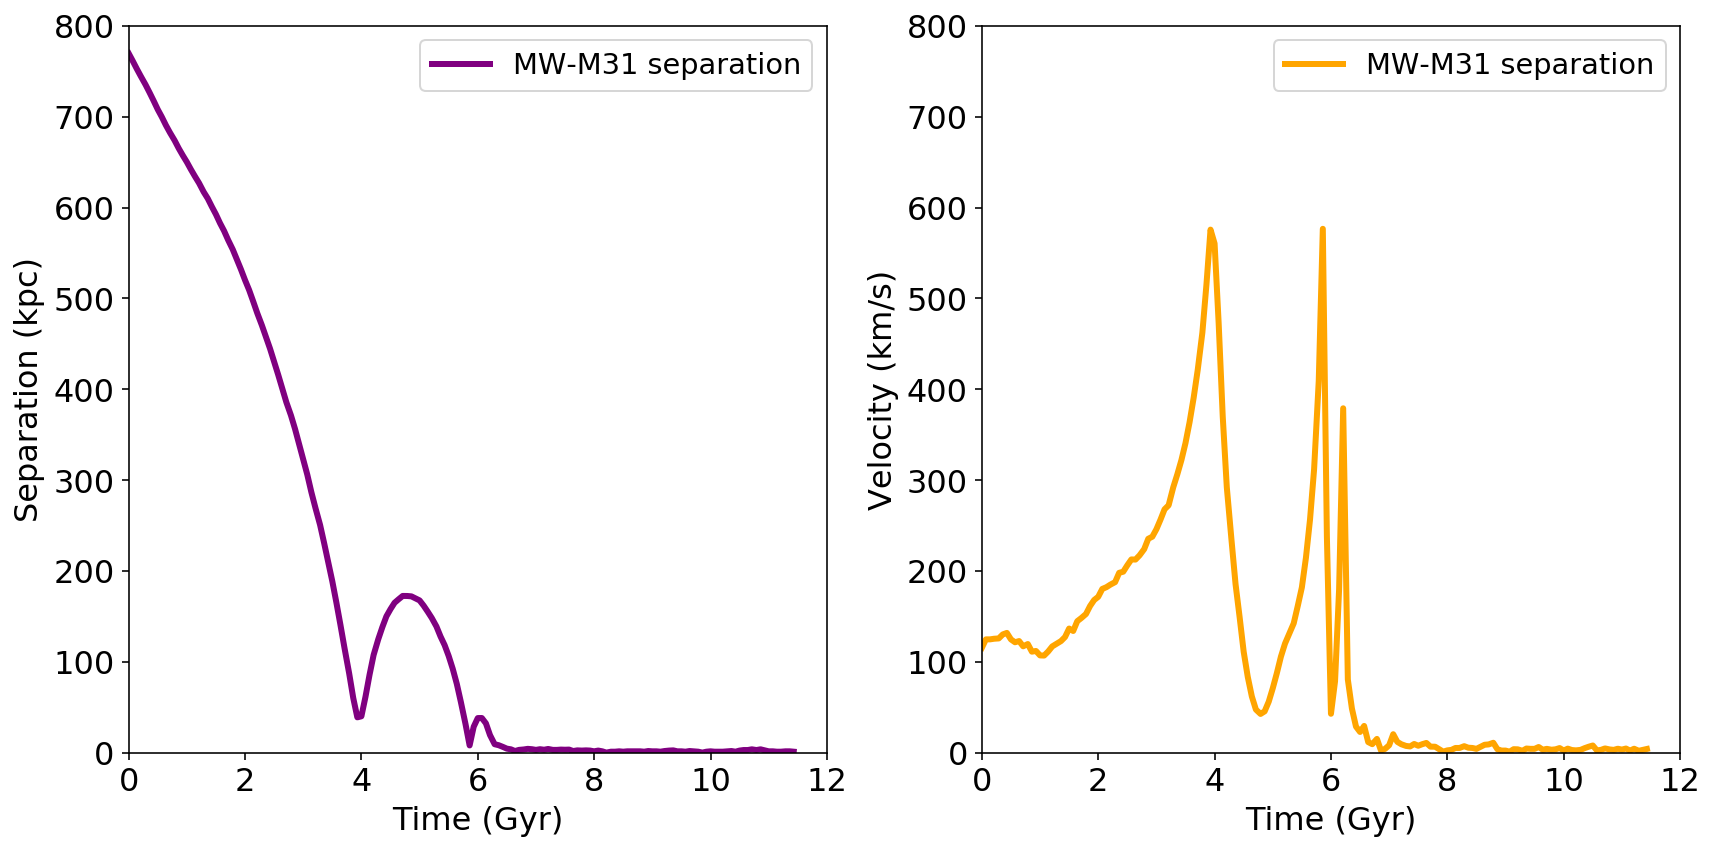

In [3]:
# This sets how many Gyr into the future we can see the orbits for. 0 Gyr = today 
# and 12 Gyr is the maximum.
mintime = 0. ## EDIT HERE!
maxtime = 12. ## EDIT HERE!

# This sets the upper limit on the separation between the galaxies.
max_sep = 800 ## EDIT HERE!


####################################
### ignore everything below here ###

# headers:  t, x, y, z, vx, vy, vz
MWOrbit = np.genfromtxt('Orbit_MW.txt',dtype=None,names=True) 
M31Orbit = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True) 
M33Orbit = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True)


# Determine the magnitude of the 
# relative position and velocities 
# of MW and M31

M31MWR = np.sqrt((MWOrbit['x']-M31Orbit['x'])**2 + (MWOrbit['y']-M31Orbit['y'])**2 
                 +(MWOrbit['z']-M31Orbit['z'])**2) 
M31MWV = np.sqrt((MWOrbit['vx']-M31Orbit['vx'])**2 + (MWOrbit['vy']-M31Orbit['vy'])**2 
                 +(MWOrbit['vz']-M31Orbit['vz'])**2) 

# of M33 and M31
M33M31R = np.sqrt((M31Orbit['x']-M33Orbit['x'])**2 + (M31Orbit['y']-M33Orbit['y'])**2 
                 +(M31Orbit['z']-M33Orbit['z'])**2) 
M33M31V = np.sqrt((M31Orbit['vx']-M33Orbit['vx'])**2 + (M31Orbit['vy']-M33Orbit['vy'])**2 
                 +(M31Orbit['vz']-M33Orbit['vz'])**2)

# of MW and M33
MWM33R = np.sqrt((MWOrbit['x']-M33Orbit['x'])**2 + (MWOrbit['y']-M33Orbit['y'])**2 
                 +(MWOrbit['z']-M33Orbit['z'])**2) 
MWM33V = np.sqrt((MWOrbit['vx']-M33Orbit['vx'])**2 + (MWOrbit['vy']-M33Orbit['vy'])**2 
                 +(MWOrbit['vz']-M33Orbit['vz'])**2)


plt.figure(figsize=(12,6))
label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot 1 - Left 
ax = plt.subplot(121)

plt.plot(MWOrbit['t'], M31MWR, lw=3, color='purple', label='MW-M31 separation')

plt.xlabel('Time (Gyr)', fontsize=16)
plt.ylabel('Separation (kpc)', fontsize=16)

ax.set_xlim(mintime, maxtime)
ax.set_ylim(0, max_sep)

plt.legend(loc='upper right',fontsize='x-large')

# Plot 2 - Right
ax2 = plt.subplot(122)

plt.plot(MWOrbit['t'], M31MWV, lw=3, color='orange', label='MW-M31 separation')

ax2.set_xlim(mintime, maxtime)
ax2.set_ylim(0, max_sep)

plt.xlabel('Time (Gyr)', fontsize=16)
plt.ylabel('Velocity (km/s)', fontsize=16)

plt.legend(loc='upper right',fontsize='x-large')
plt.tight_layout()

### <b> <font color='blue'> Q: When will the MW and Andromeda (M31) first collide? Hint: What do the dips and the peaks in each plot above represent? </font> </b> 

### <b> <font color='blue'> Q: How many times will the two galaxies interact before they completely merge? When will that happen?</font> </b> 

<b> <font color ='red'>You may need to zoom in on the plots above by changing the quantities labeled "mintime", "maxtime" and "max_sep" at the beginning of the cell above. </font></b>

## Part 2: What will the galaxies look like when they first collide? 
<font color='red'><b> Hit Shift+Return </font></b> to see what the galaxies look like at the start of the simulation (snap=0), which corresponds to today. 

In [4]:
####################################
### ignore everything below here ###

#imports all the data for the x,y,z positions of the particles
df_MW = pd.read_csv("MW_xyz_data.csv")
df_M31 = pd.read_csv("M31_xyz_data.csv")

def plotting_double(snap):
    thissnap = '000' + str(int(snap))                       
    thissnap = thissnap[-3:]
    
    xD = np.array(df_MW.loc[lambda df: df_MW.snap == snap, "X"])
    yD = np.array(df_MW.loc[lambda df: df_MW.snap == snap, "Y"])
    xD2 = np.array(df_M31.loc[lambda df: df_M31.snap == snap, "X"])
    yD2 = np.array(df_M31.loc[lambda df: df_M31.snap == snap, "Y"])
    
    fig = plt.figure(figsize=(12,6))

    ax = plt.subplot(121)

    ax.hist2d(xD, yD, bins=600, norm=LogNorm(), cmap='magma')

    # Add axis labels
    ax.set_xlabel('x (kpc)', fontsize=22)
    ax.set_ylabel('y (kpc)', fontsize=22)

    box = 100.
    #set axis limits
    ax.set_ylim(-box,box)
    ax.set_xlim(-box,box)
    plt.figtext(0.15, 0.85, 'MW',fontsize=22)
    

    ax2 = plt.subplot(122)
    ax2.hist2d(xD2, yD2, bins=600, norm=LogNorm(), cmap='magma')

    # Add axis labels
    ax2.set_xlabel('x (kpc)', fontsize=22)
    ax2.set_ylabel('y (kpc)', fontsize=22)

    #set axis limits
    ax2.set_ylim(-box,box)
    ax2.set_xlim(-box,box)
    plt.figtext(0.9, 0.85, 'M31',fontsize=22)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle('snap = %s, time = %s Gyr'%(snap, round(int(thissnap)*14.287/1000,2)), fontsize=22, color='blue')
    plt.show()

#This is where the interactive plot happens. If you want to add a print statement here to tell them what to do
interactive_plot_1 = interactive(plotting_double, snap=FloatSlider(min=0, max=800, step=10, value=0, continuous_update=False))
display(interactive_plot_1)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description=u'snap', max=800.0, step=10.0), Output()), _dom_classes=('widget-interact',))

<font color='red'> <b> Now go to the top of the plot above and move the slider labeled 'snap' to see what the galaxies will look like at future points in the orbit. Each "snap" or "snapshot" corresponds to about 14 million years in the future.</font> </b>

# <u>Activity 3: The Future Evolution of M33 </u>

## Part 1:  What happens to M33 during the MW and Andromeda collision? It started off as a satellite galaxy of Andromeda. 

The following piece of code will plot the trajectories of M33-MW and M33-M31 until 6.5 Gyr into the future. <font color='red'> <b> Hit Shift+Return.</b></font>.  

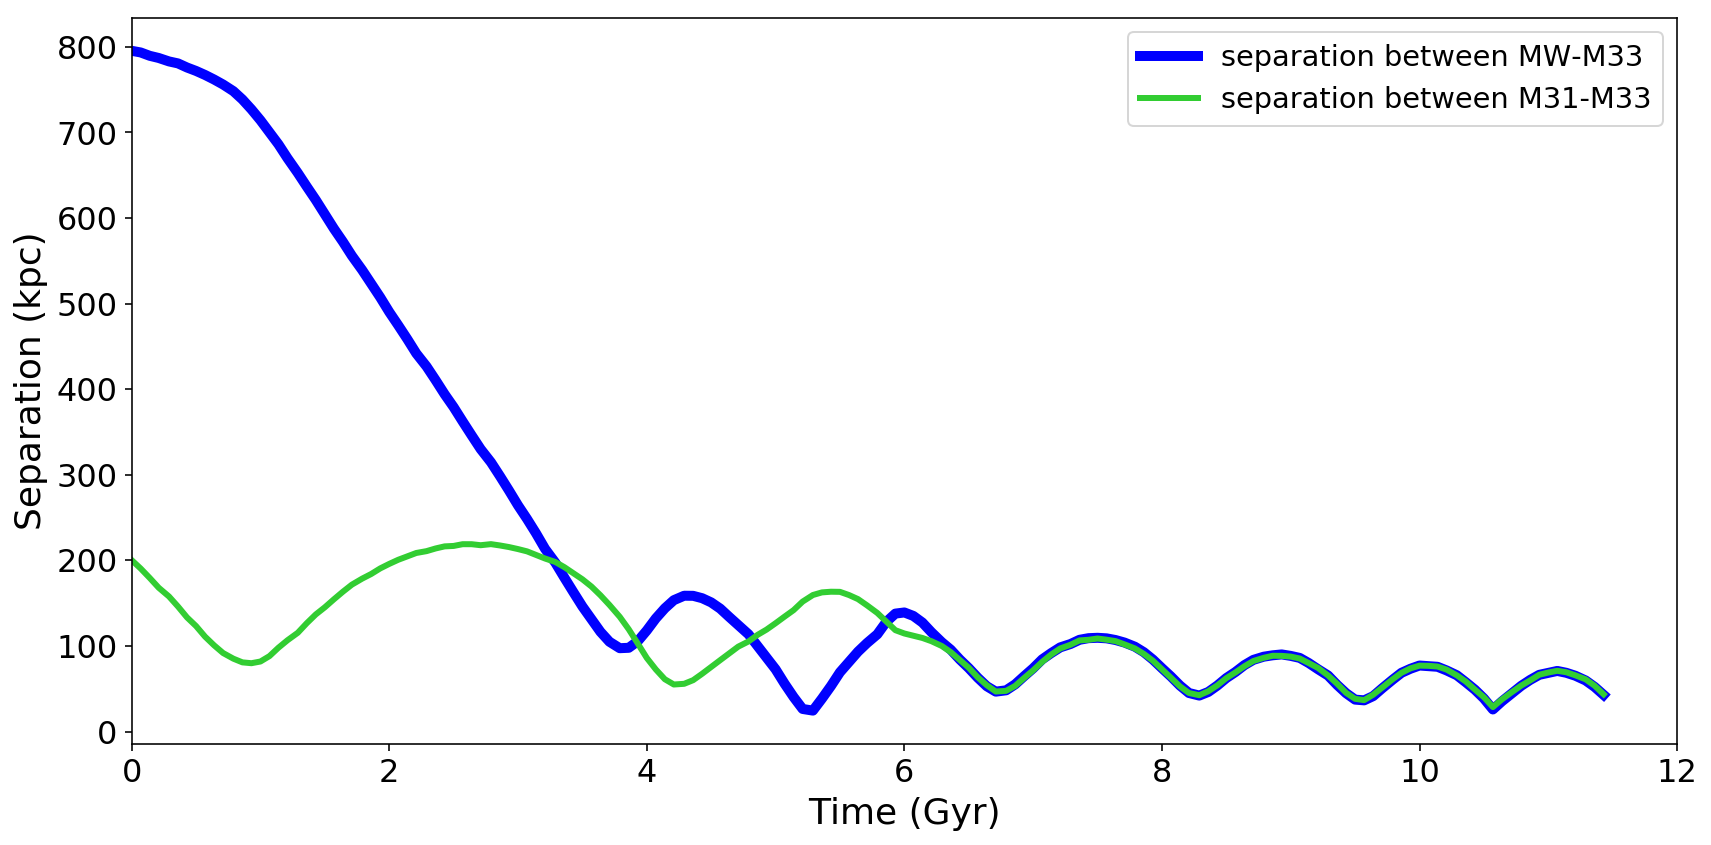

In [5]:
time = 12 ## EDIT HERE!

####################################
### ignore everything below this ###
plt.figure(figsize=(12,6))
# Plot 1
ax = plt.subplot(111)
plt.plot(M33Orbit['t'], MWM33R, lw=5, color='blue', label='separation between MW-M33')
plt.plot(M33Orbit['t'], M33M31R, lw=3, color='limegreen', label='separation between M31-M33')

plt.xlabel('Time (Gyr)', fontsize=18)
plt.ylabel('Separation (kpc)', fontsize=18)

label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(loc='upper right',fontsize='x-large')
plt.xlim(0, time)
ax.set_rasterized(True)


plt.tight_layout()

### <font color='blue'>Q: Will M33 collide with either the MW, Andromeda, or the merged galaxy? 

<font color='red'> <b> Edit the line that says 'time = ' in the cell above to anything between 0 and 12 to see the future orbit of M33. </font> </b>


## Part 2: What happens to the morphology of M33 over time?

The cell below shows you what M33 looks like at the start of the simulation. <font color='red'> <b>Hit Shift+Return.</b></font>

In [6]:
particle_type = 1 ## EDIT HERE! 1 = dark matter particles, 2 = star particles

### ignore everything below here ### 
def single_plotting(snap, particle_type):
    thissnap = '000' + str(int(snap))                       
    thissnap = thissnap[-3:]  

    ## M33
    COMD3 = CenterOfMass("Sims/M33_VLowRes/M33_%s.txt"%thissnap,particle_type)
    COMP3 = [-475. * u.kpc, 490. * u.kpc, -415 * u.kpc]#COMD3.COM_P(0.1, 4.0)
    COMV3 = COMD3.COM_V(COMP3[0],COMP3[1],COMP3[2])

    # Determine positions and velocities of disk particles relative to COM motion
    xD3 = COMD3.x - float(COMP3[0]/u.kpc)
    yD3 = COMD3.y - float(COMP3[1]/u.kpc)
    zD3 = COMD3.z - float(COMP3[2]/u.kpc)

    plt.figure(figsize=(8,8))
    plt.title('snap = %s, time = %s Gyr'%(snap, round(int(thissnap)*14.287/1000,2)), fontsize=22, color='blue')
    

    plt.hist2d(xD3, yD3, bins=300, norm=LogNorm(), cmap='magma')

    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y (kpc)', fontsize=22)
    plt.figtext(1., 0.5, 'particle_type: \n 1 = dark matter particles \n 2 = star particles', fontsize=22)
    plt.figtext(0.15, 0.82, 'M33', fontsize=22)
    
    if particle_type == 1:
        plt.figtext(0.65, 0.82, 'dark matter', color='red', fontsize=22)
        
    if particle_type == 2:
        plt.figtext(0.65, 0.82, 'stars', color='red', fontsize=22)
        
    plt.show()

#This is where the interactive plot happens. If you want to add a print statement here to tell them what to do
interactive_plot_2 = interactive(single_plotting, snap=FloatSlider(min=0, max=800, step=10, value=0, continuous_update=False), particle_type = (1,2,1))
display(interactive_plot_2)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description=u'snap', max=800.0, step=10.0), IntSlider(value=1, description=u'particle_type', max=2, min=1), Output()), _dom_classes=('widget-interact',))

### <font color='blue'>Q: How does M33's morphology change over time?</font>
<br>
<font color='red'> <b> Go to the top of the plot above and move the slider labeled 'snap' to see what M33 will look like at future points in the orbit.  </font> </b>
<br>


### <font color='blue'> Q: Do the stars and the dark matter particles have the same shape? What about how far the stars vs. dark matter particles extend in size (hint: how do the limits of the x and y axis change)?</font>
<br>
<font color='red'> <b> Go to the top of the plot above and move the slider labeled 'particle_type' to 2. 1 represents the dark matter halo particles and 2 shows the star particles. 

<br> Then, move the 'snap' slider to compare and contrast the features of the stars and dark matter in M33 as a function of time. </font> </b>